# Customer Attrition


##### Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

# Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


## Data Cleaning

In [5]:
df['TotalCharges'].isna().sum()

0

In [6]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [9]:
#Dropping null values from total charges column
todrop = df.loc[df['TotalCharges'].isna()].index
df.drop(todrop, inplace = True)

In [10]:
#Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
#replace 'No internet service' to No

replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [12]:
#replace values from binary
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [13]:
#Separating churn and non churn customers
churn_df     = df[df["Churn"] == "Yes"]
not_churn_df = df[df["Churn"] == "No"]


In [14]:
#Convert target to binary
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0

In [15]:
df.loc[df['Churn'] == 'No', 'Churn'] = 0

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [16]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

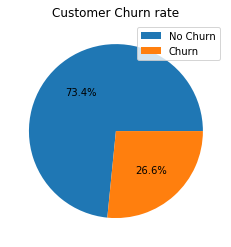

In [17]:
lab = ['No Churn', 'Churn']
val = df['Churn'].value_counts().values.tolist()

fix, ax = plt.subplots()
ax.pie(val, autopct='%1.1f%%')
plt.legend(labels = lab)
plt.title('Customer Churn rate')
plt.show()

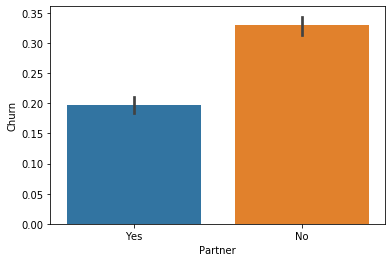

In [18]:
sns.barplot(x=df['Partner'], y=df['Churn'])

In [19]:
def plot_bar(column):
    sns.barplot(x=df[column], y=df['Churn'])
    plt.ylabel('Churn Rate')
    plt.show()


In [20]:
def plot_histogram(column):
    x = churn_df[column]
    y = not_churn_df[column]
    
    plt.hist([x, y], label = ['churn', 'not churn'], density = True)
    plt.legend()
    
    plt.title(str(column + ' churn distribution'))
    
    plt.xlabel(column)
    plt.ylabel('proportion')
    
    plt.show()
    

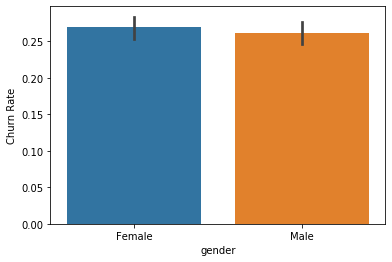

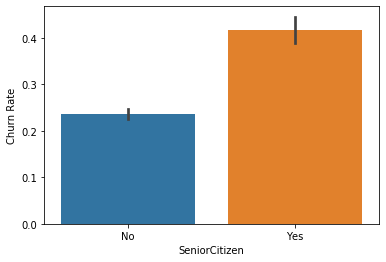

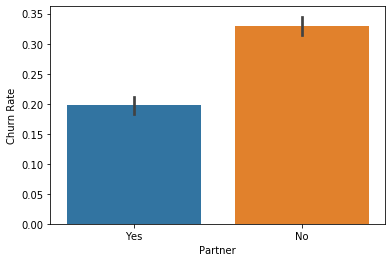

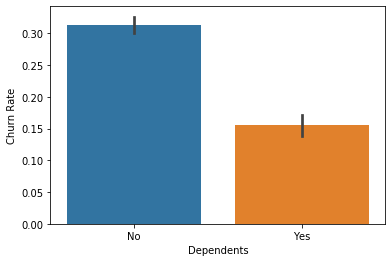

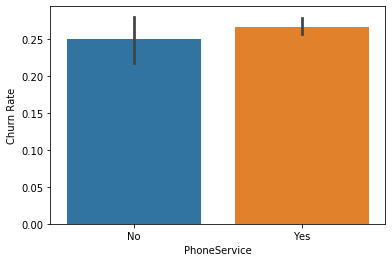

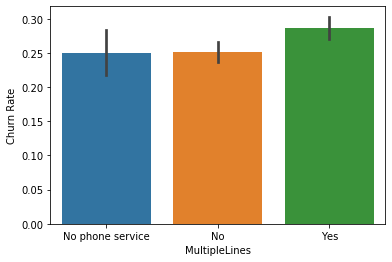

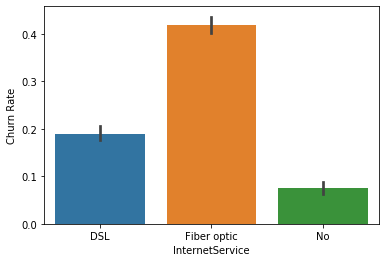

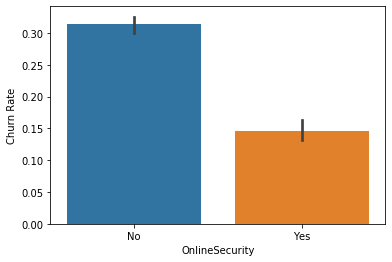

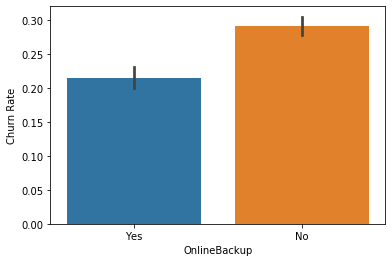

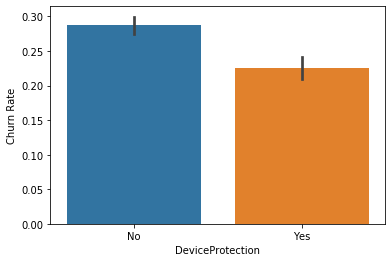

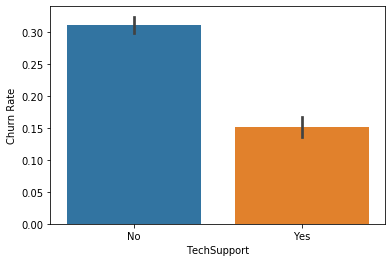

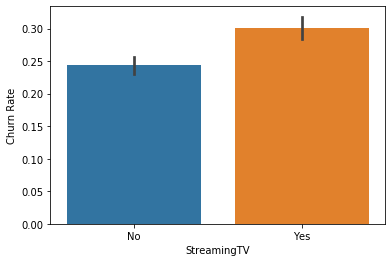

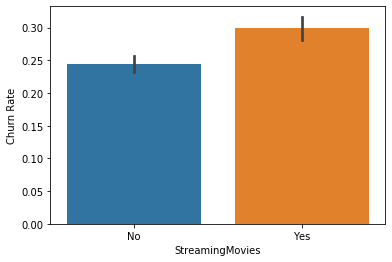

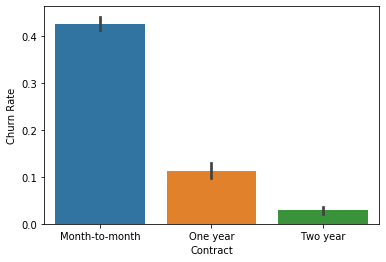

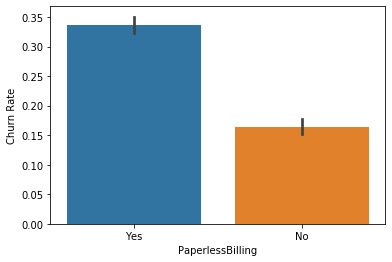

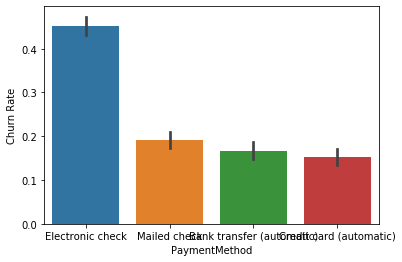

In [21]:
for i in cat_cols:
    plot_bar(i)

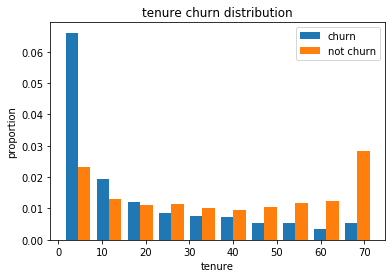

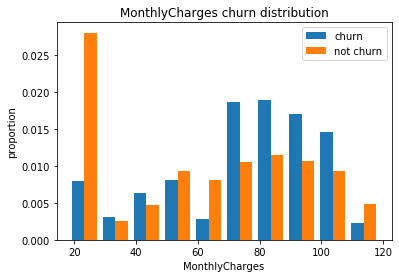

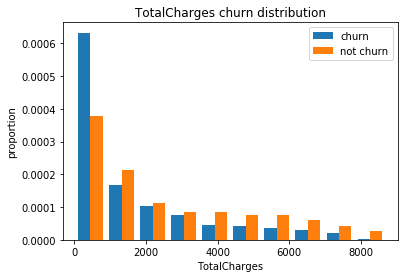

In [22]:
for i in num_cols:
    plot_histogram(i)

### Data Preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [25]:
#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [26]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [27]:
#Scaling Numerical Columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)

In [28]:
#Dropping original values and merge scaled values
df_og = df.copy()
df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index = True, right_index = True, how ='left')

In [29]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7021.000000,7021.000000,7021.000000
mean,0.504693,0.162400,0.482509,0.298493,0.903299,0.286547,0.344852,0.343857,0.290102,0.384386,...,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,0.000538,-0.000271,0.000450
std,0.500014,0.368844,0.499729,0.457629,0.295571,0.452180,0.475354,0.475028,0.453842,0.486484,...,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,1.000141,0.999997,1.000279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.280248,-1.547283,-0.999069
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.954296,-0.970561,-0.830227
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.139417,0.184544,-0.390473
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.919926,0.832733,0.667141
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.612573,1.793381,2.824261


In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [31]:
# Compute the correlation matrix
corr = df.corr()

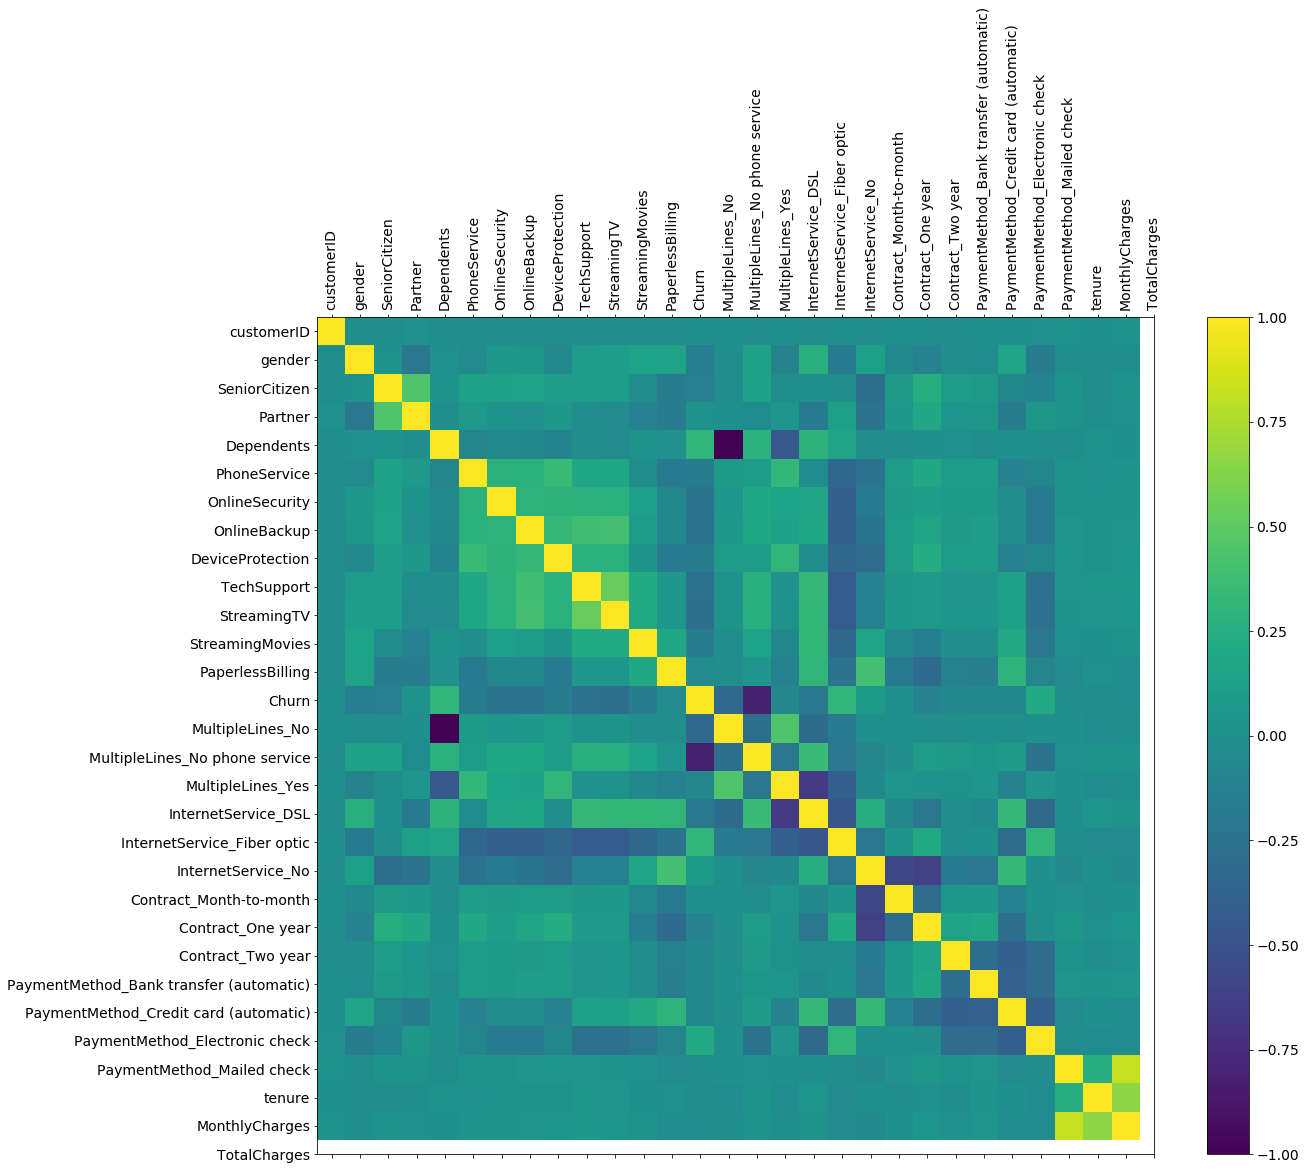

In [32]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);

### Visualising data with principle componant analysis

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components = 2)

In [35]:
todrop = df.loc[df['TotalCharges'].isna()].index
df.drop(todrop, inplace = True)

In [36]:
X = df[[i for i in df.columns if i not in Id_col + target_col]]
Y = df[target_col + Id_col]

In [37]:
principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

In [38]:
pca_data

,PC1,PC2,Churn,customerID
0,-1.997706,0.023464,Not Churn,7590-VHVEG
1,-0.249463,-0.797071,Not Churn,5575-GNVDE
2,-1.575538,-0.632441,Churn,3668-QPYBK
3,-0.189113,0.019860,Not Churn,7795-CFOCW
4,-1.311677,-0.512387,Churn,9237-HQITU
...,...,...,...,...
7016,0.036813,-0.210180,Not Churn,1471-GIQKQ
7017,3.051348,-0.252810,Not Churn,4807-IZYOZ
7018,-1.653516,0.371463,Churn,1122-JWTJW
7019,-1.200570,-1.402328,Not Churn,9710-NJERN


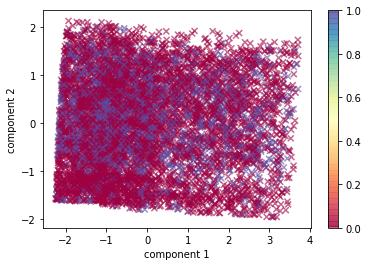

In [39]:
plt.scatter(pca_data['PC1'], pca_data['PC2'],
            c=df['Churn'], edgecolor='none', alpha=0.6, cmap = 'Spectral', marker = 'x' )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.rcParams["figure.figsize"] = (8, 8)


plt.colorbar();

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#splitting train and test data 

train,test = train_test_split(df,test_size = .25 ,random_state = 111)

##seperating dependent and independent variables
cols    = [i for i in df.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [45]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cols, cf):
    
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    #coefficients
    if cf == 'coefficients':
        coefficients = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == 'features':
        coefficients = pd.DataFrame(algorithm.feature_importances_)
    
    column_df = pd.DataFrame(cols)
    coef_sumry = pd.merge(coefficients, column_df, left_index = True, right_index = True, how = 'left')
    
    coef_sumry.columns = ['coefficients', 'features']
    coef_sumry = coef_sumry.sort_values(by = 'coefficients', ascending = False)
    
    print(algorithm)
    print('\n Classification Report : \n', classification_report(testing_y, predictions))
    print('Accuracy Score: ', accuracy_score(testing_y, predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    # roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions)
    print('Area under curve : ', model_roc_auc, '\n')
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
    
    #plot confusion matrix
    #plot confusion matrix
    class_names = algorithm.classes_

    disp = plot_confusion_matrix(algorithm, testing_x, testing_y,
                                 cmap=plt.cm.Blues,
                                 display_labels = ['Churn', 'Not Churn'],
                                 normalize= 'true')
    print(disp.confusion_matrix)
    plt.title('Confusion Matrix')
    plt.legend(class_names)
    plt.show()
    
    
     #plot roc curve
    plt.plot(fpr,tpr)
    plt.xticks(rotation=90)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    #coefficient importances
    plt.bar(x=coef_sumry['features'], height=coef_sumry['coefficients'])
    plt.xticks(rotation=90)
    plt.title('Feature Importances')

    plt.show()
    

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1283
           1       0.63      0.53      0.58       473

    accuracy                           0.79      1756
   macro avg       0.73      0.71      0.72      1756
weighted avg       0.78      0.79      0.78      1756

Accuracy Score:  0.7892938496583144
Area under curve :  0.7089851184542043 

[[0.88308652 0.11691348]
 [0.46511628 0.53488372]]


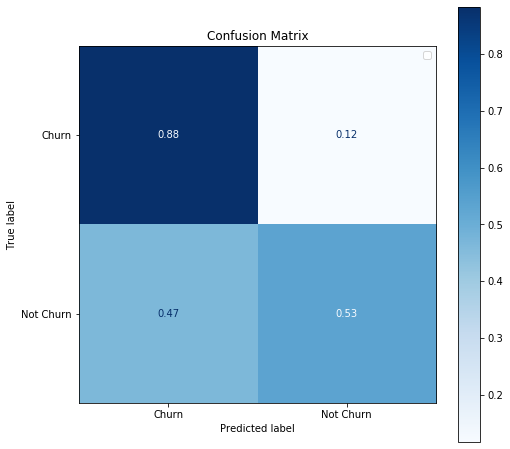

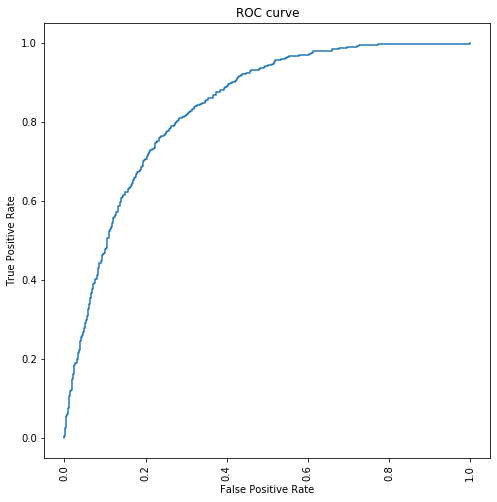

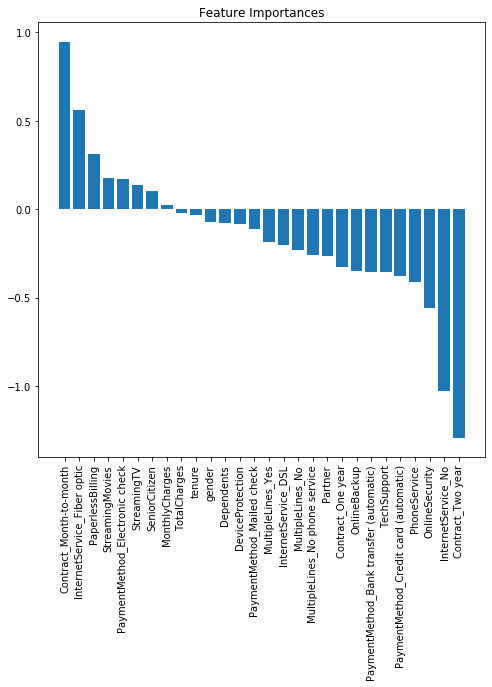

In [46]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients")

### 5.2. Synthetic Minority Oversampling TEchnique (SMOTE)
Randomly pick a point from the minority class.

Compute the k-nearest neighbors (for some pre-specified k) for this point.

Add k new points somewhere between the chosen point and each of its neighbors

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1283
           1       0.52      0.79      0.63       473

    accuracy                           0.75      1756
   macro avg       0.71      0.76      0.72      1756
weighted avg       0.80      0.75      0.76      1756

Accuracy Score:  0.7482915717539863
Area under curve :  0.7623451246500423 

[[0.73187841 0.26812159]
 [0.20718816 0.79281184]]


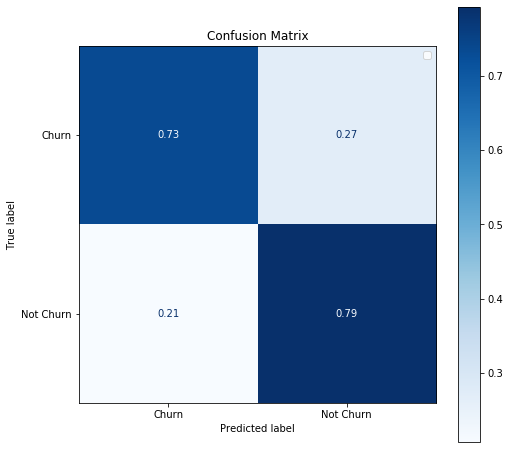

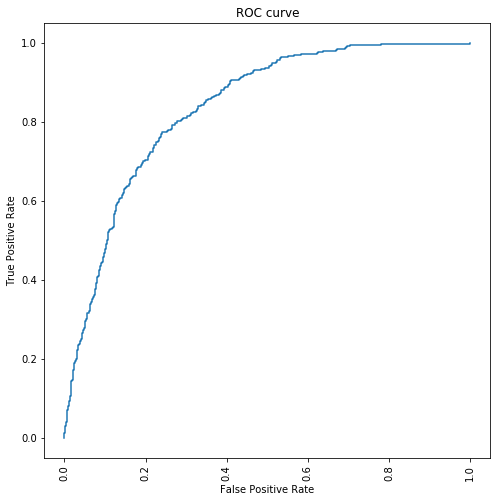

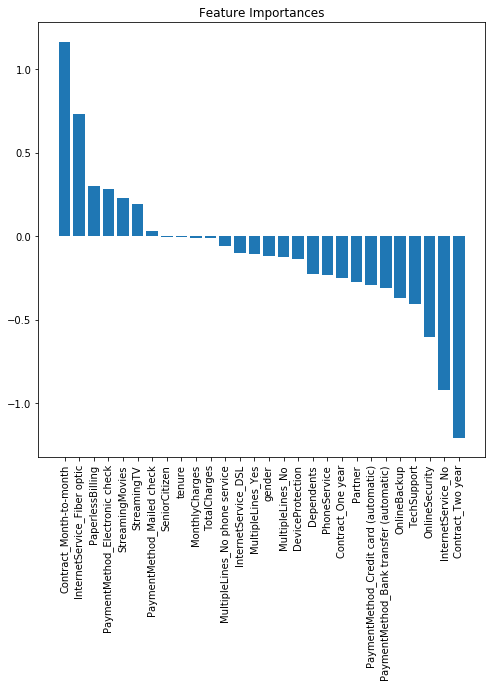

In [47]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in df.columns if i not in Id_col+target_col]

smote_X = df[cols]
smote_Y = df[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###



logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients")

### Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1283
           1       0.51      0.79      0.62       473

    accuracy                           0.74      1756
   macro avg       0.71      0.76      0.71      1756
weighted avg       0.80      0.74      0.75      1756

Accuracy Score:  0.7414578587699316
Area under curve :  0.7556664727720938 

[[0.7248636  0.2751364 ]
 [0.21353066 0.78646934]]


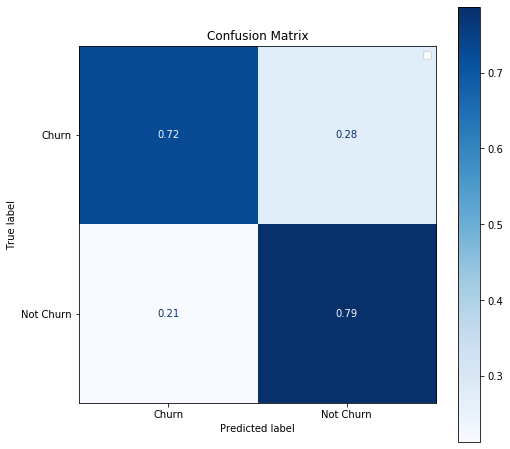

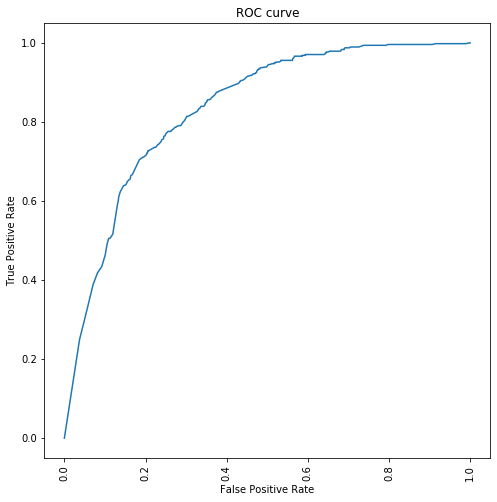

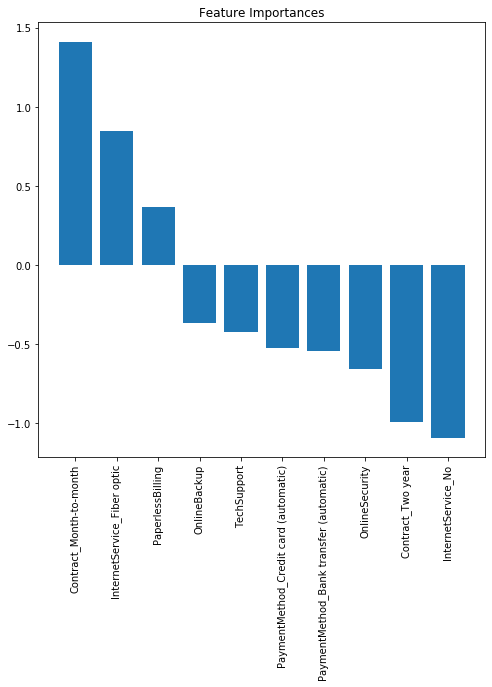

,rfe_support,columns,ranking
0,False,gender,11
1,False,SeniorCitizen,18
2,False,Partner,3
3,False,Dependents,6
4,False,PhoneService,9
5,True,OnlineSecurity,1
6,True,OnlineBackup,1
7,False,DeviceProtection,10
8,True,TechSupport,1
9,False,StreamingTV,7


In [48]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in df.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients")


idc_rfe

### Univariate Selection
Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
uses the chi squared (chi^2) statistical test for non-negative features to select the best features

scores
[2.54297062e-01 1.33482766e+02 8.18577694e+01 1.31271509e+02
 9.29483891e-02 1.47165601e+02 3.12098318e+01 2.02160070e+01
 1.35439602e+02 1.73206148e+01 1.59306111e+01 1.04979224e+02
 3.88864216e+00 8.68247305e-01 6.51465136e+00 7.11376111e+01
 3.72082851e+02 2.85475152e+02 5.16714004e+02 1.76608724e+02
 4.86223101e+02 7.66190658e+01 9.99725387e+01 4.24113152e+02
 4.47251434e+01 1.63773281e+04 3.65307468e+03 6.29630810e+05]
P - Values
[6.14065505e-001 7.08954608e-031 1.46240915e-019 2.15953960e-030
 7.60461827e-001 7.21988253e-034 2.31590182e-008 6.91717063e-006
 2.64595220e-031 3.15742928e-005 6.57073922e-005 1.23423173e-024
 4.86137123e-002 3.51440986e-001 1.06989295e-002 3.33158163e-017
 6.58713045e-083 4.81399951e-064 2.19511926e-114 2.66631661e-040
 9.45428638e-108 2.07328356e-018 1.54524820e-023 3.10584857e-094
 2.26727030e-011 0.00000000e+000 0.00000000e+000 0.00000000e+000]


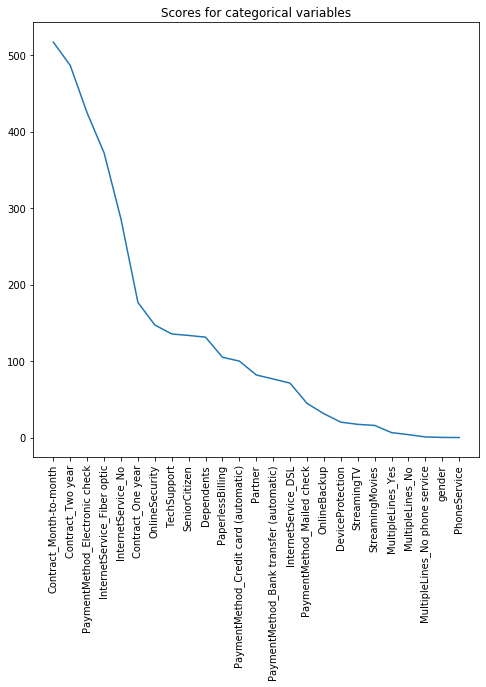

Text(0.5, 1.0, 'Score for numerical varibales')

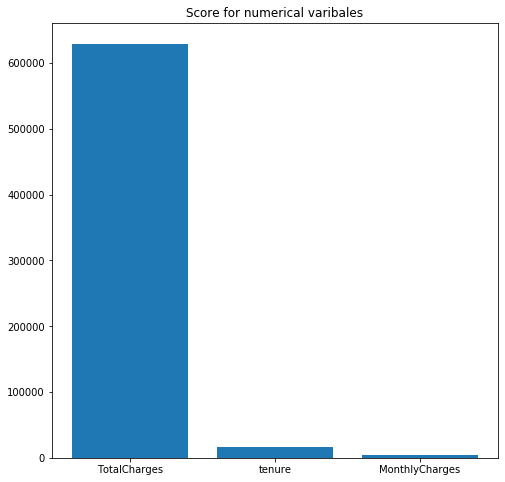

In [49]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in df.columns if i not in Id_col + target_col ]

#dataframe with non negative values
df_x = df_og[cols]
df_y = df_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(df_x,df_y)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)

score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

plt.plot(score[score["feature_type"] == "Categorical"]["features"],
                    score[score["feature_type"] == "Categorical"]["scores"])
plt.xticks(rotation=90)
plt.title('Scores for categorical variables')
plt.show()


plt.bar(x = score[score["feature_type"] == "Numerical"]["features"],
                height = score[score["feature_type"] == "Numerical"]["scores"])
plt.title('Score for numerical varibales')

### Decision Tree Visualization
Using top three numerical features

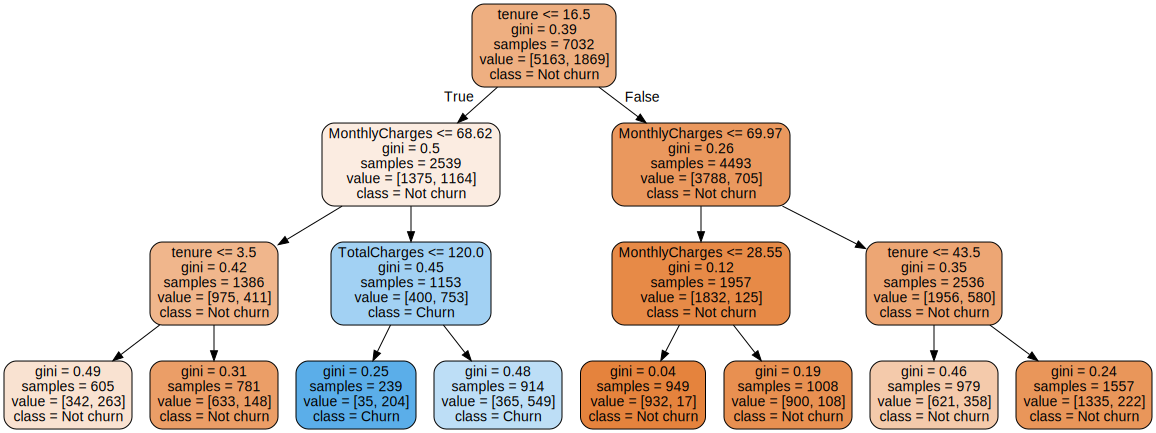

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#top 3 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 3 numerical features
features_num  = score[score["feature_type"] == "Numerical"]["features"][:3].tolist()


#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    #separating dependent and in dependent variables
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x,dtc_y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_Y,
                                 columns,"features")
    display(graph)
    
plot_decision_tree(features_num,3,"gini","best")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1283
           1       0.55      0.53      0.54       473

    accuracy                           0.76      1756
   macro avg       0.69      0.69      0.69      1756
weighted avg       0.75      0.76      0.76      1756

Accuracy Score:  0.7579726651480638
Area under curve :  0.6862162380388196 

[[0.84177708 0.15822292]
 [0.46934461 0.53065539]]


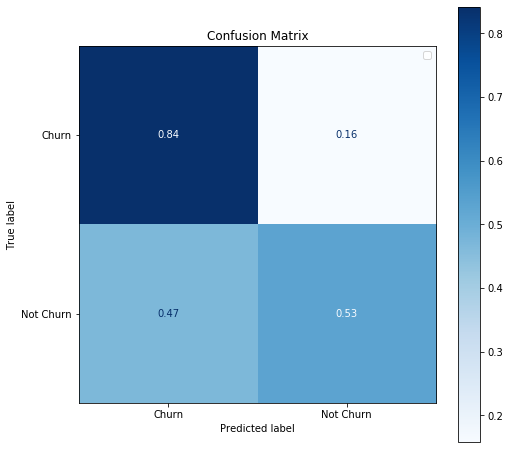

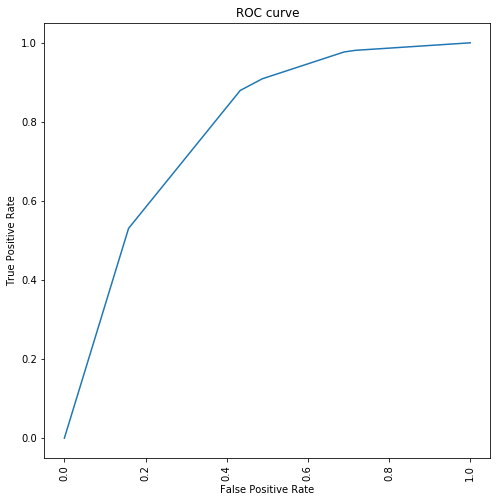

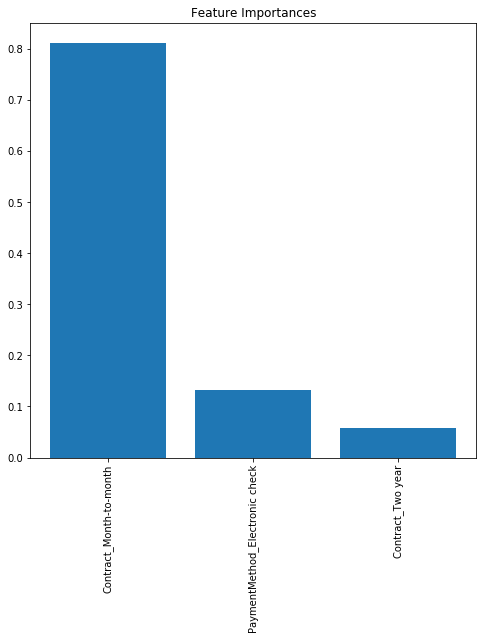

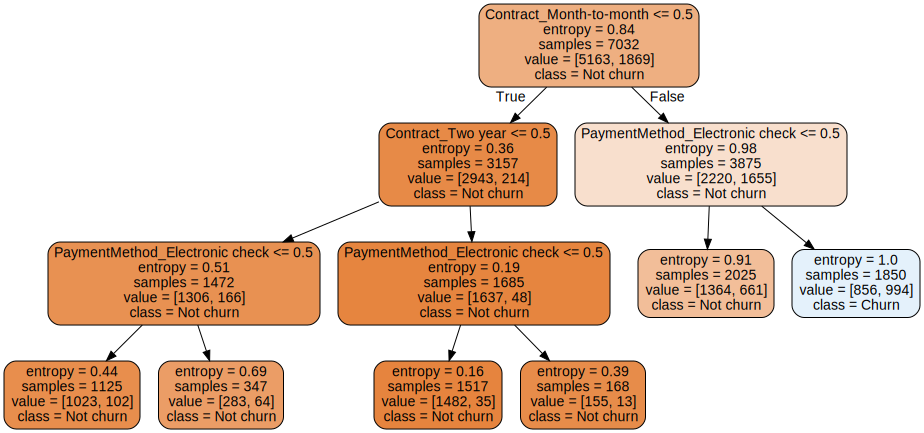

In [51]:
plot_decision_tree(features_cat,3,"entropy","best",
                   model_performance = True ,)

### KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y):
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
        #plot confusion matrix
    class_names = algorithm.classes_

    disp = plot_confusion_matrix(algorithm, testing_x, testing_y,
                                 cmap=plt.cm.Blues,
                                 display_labels = ['Churn', 'Not Churn'],
                                 normalize= 'true')
    print(disp.confusion_matrix)
    plt.title('Confusion Matrix')
    plt.legend(class_names)
    plt.show()
    
    
     #plot roc curve
    plt.plot(fpr,tpr)
    plt.xticks(rotation=90)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    #coefficient importances
#     plt.bar(x=coef_sumry['features'], height=coef_sumry['coefficients'])
#     plt.xticks(rotation=90)
#     plt.title('Feature Importances')

    plt.show()

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.67      0.76      1283
           1       0.46      0.77      0.58       473

    accuracy                           0.70      1756
   macro avg       0.67      0.72      0.67      1756
weighted avg       0.77      0.70      0.71      1756

Accuracy Score   :  0.6970387243735763
Area under curve :  0.7192626293751926
[[0.6710834  0.3289166 ]
 [0.23255814 0.76744186]]


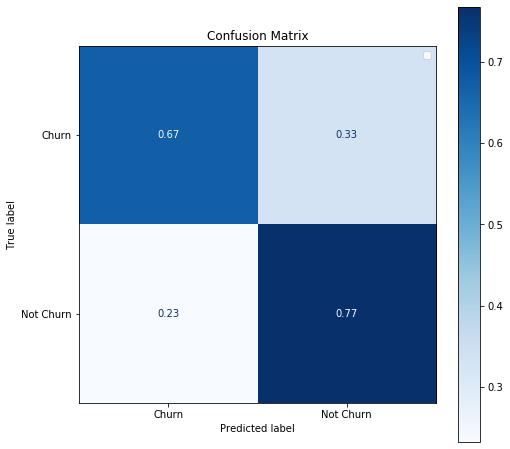

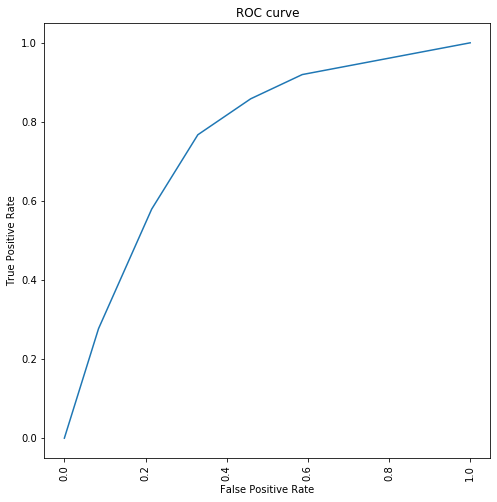

In [57]:
telecom_churn_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y)

### A random forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier


/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


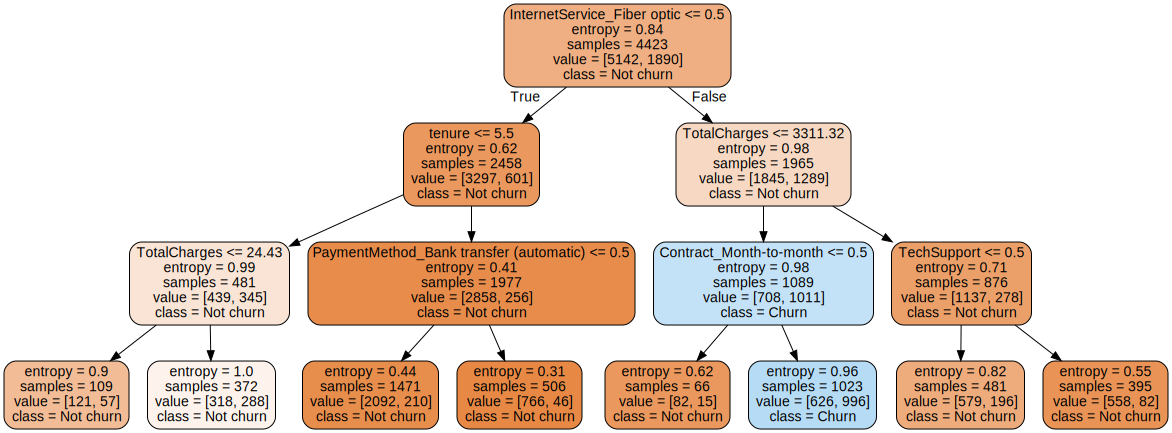

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.96      0.85      1283
           1       0.68      0.21      0.32       473

    accuracy                           0.76      1756
   macro avg       0.72      0.59      0.59      1756
weighted avg       0.74      0.76      0.71      1756

Accuracy Score:  0.760250569476082
Area under curve :  0.5870020877996371 

[[0.96258769 0.0374123

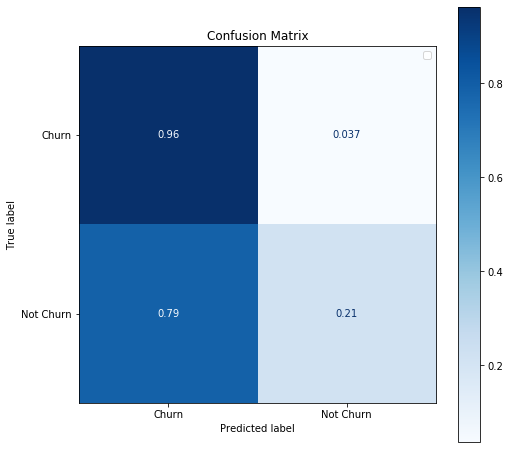

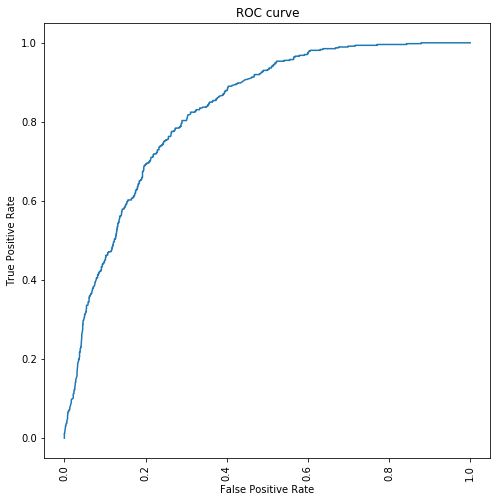

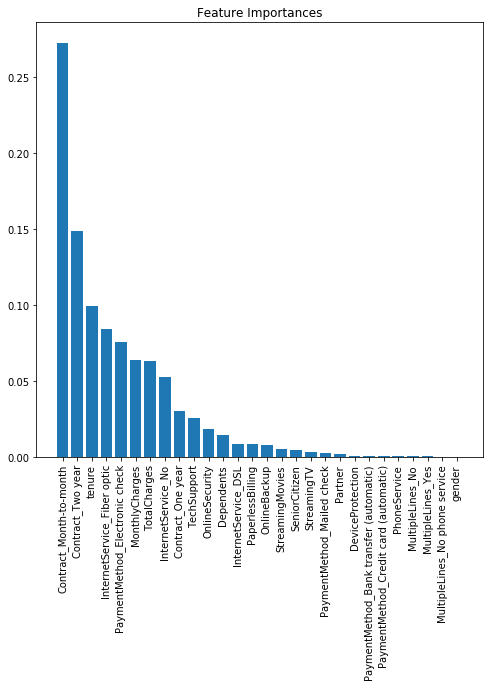

In [60]:
def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = df_og[columns + target_col].copy()
    
    #train and test datasets
    rf_x     = dataframe[[i for i in columns if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(rfc,
                                 rf_x,test_X[columns],
                                 rf_y,test_Y,
                                 columns,"features")
        

cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
plot_tree_randomforest(cols1,100,99,3,"entropy",True)

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


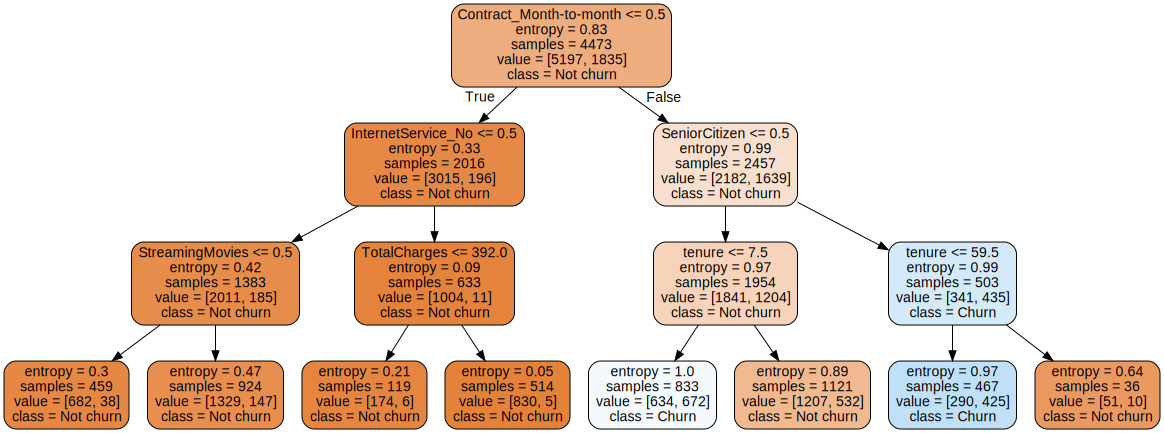

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


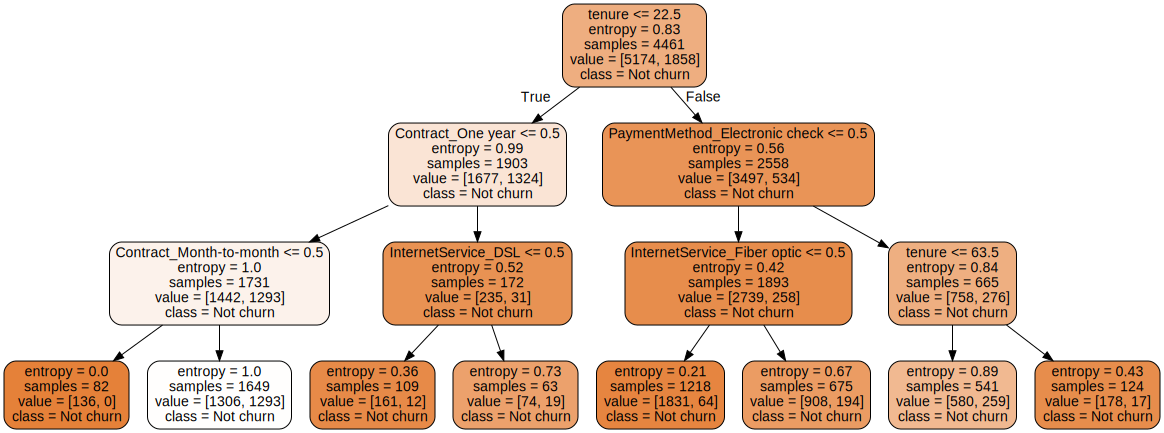

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


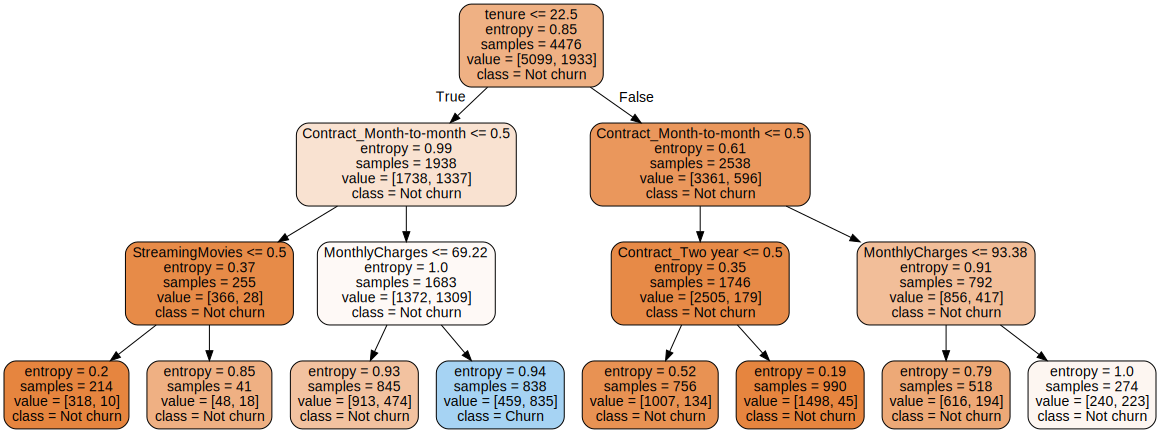

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


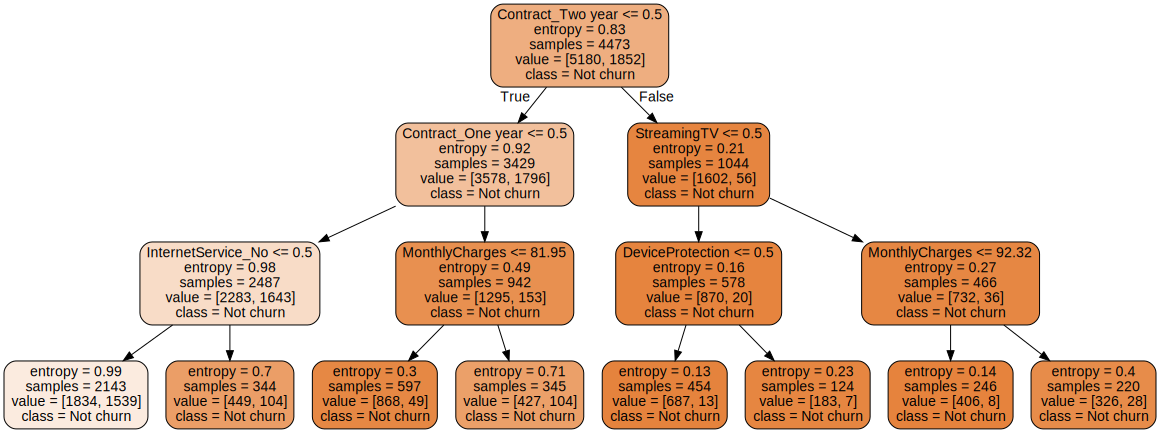

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


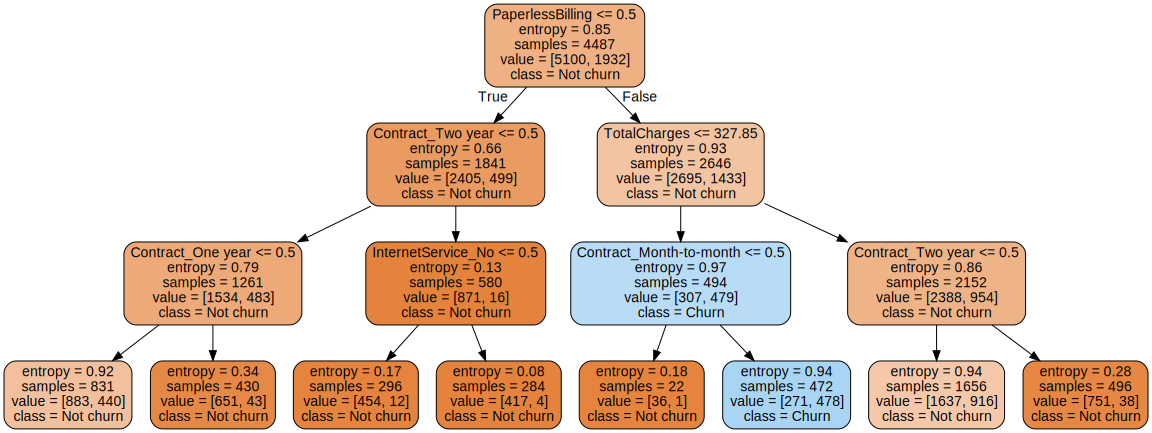

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


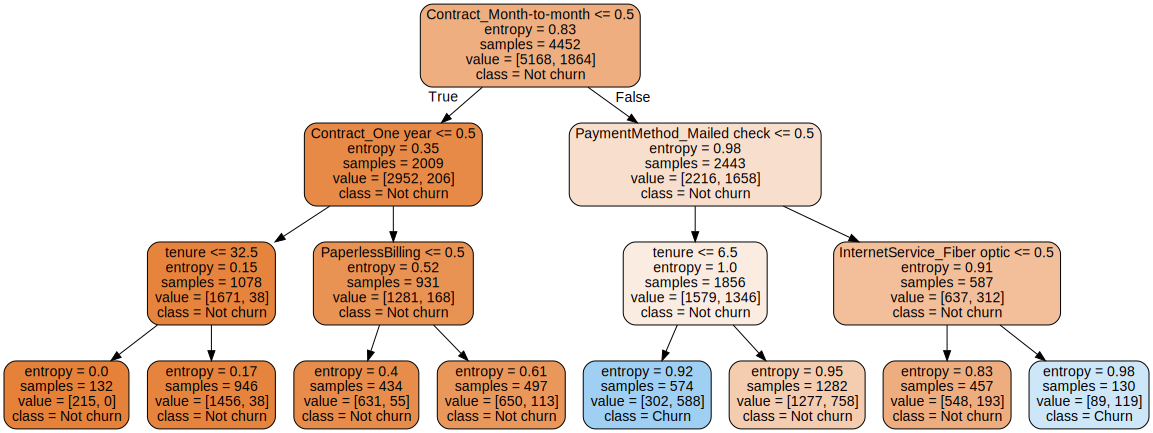

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


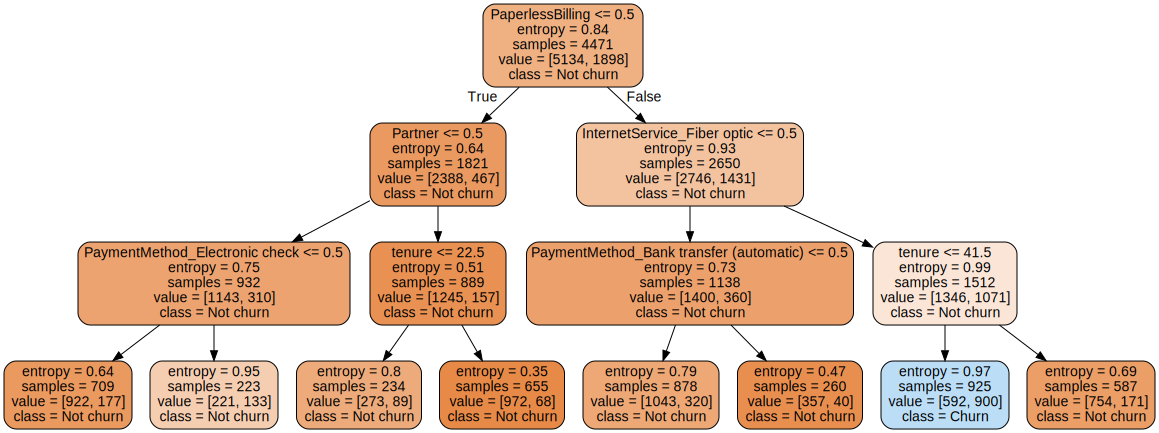

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


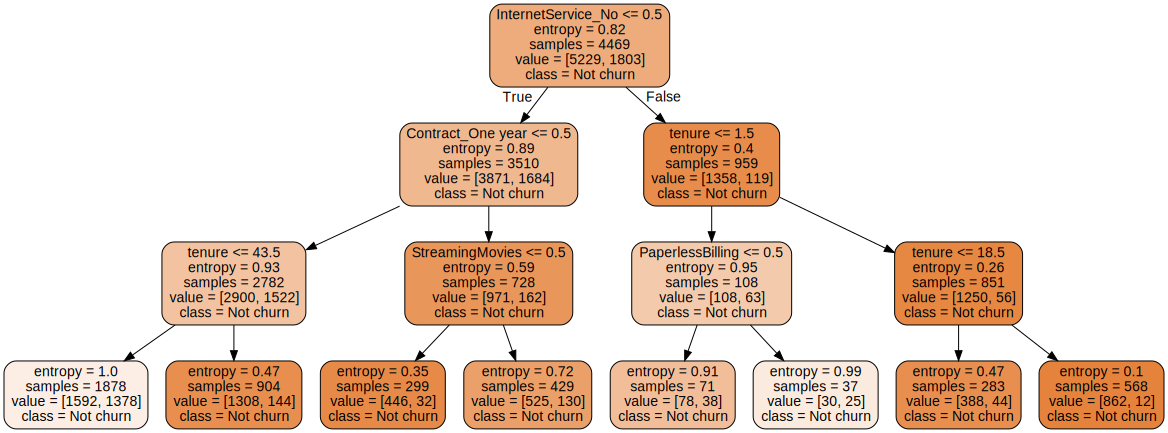

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


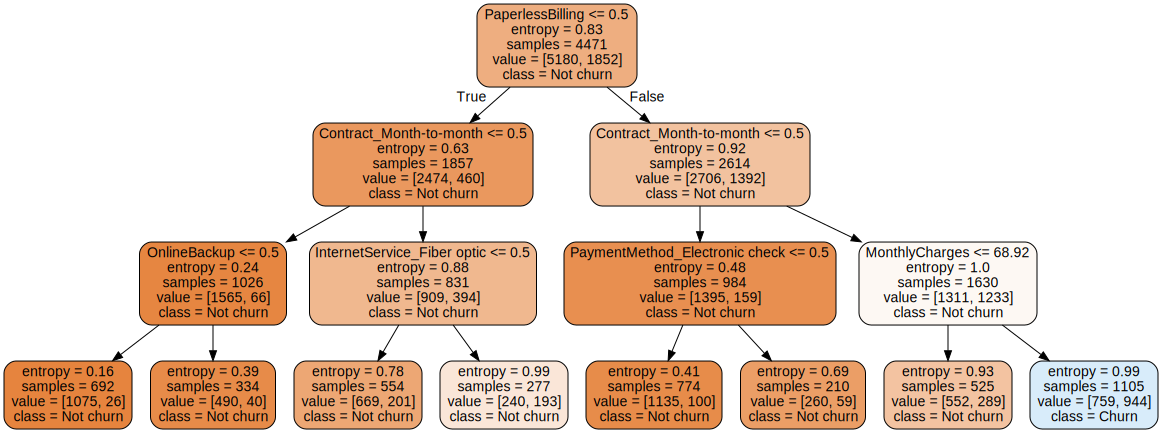

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


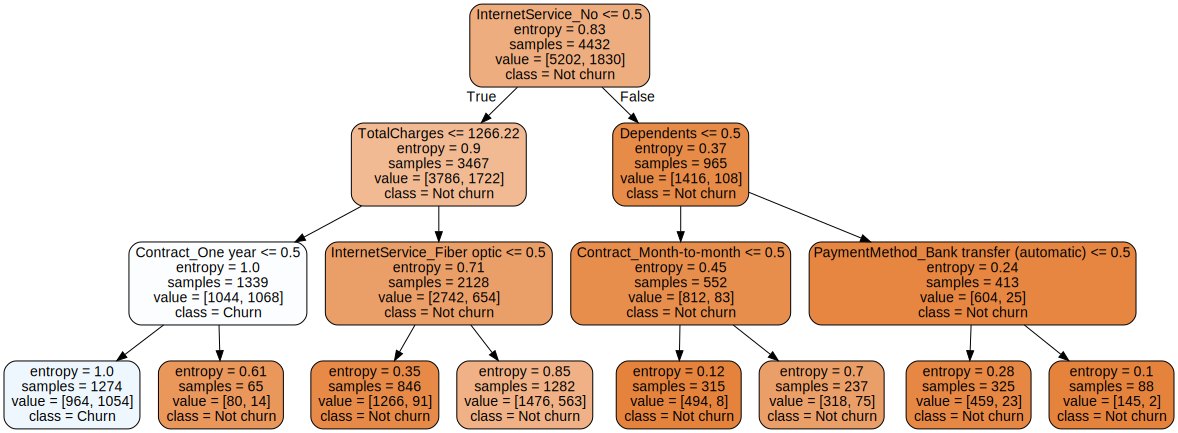

In [61]:
n = np.arange(0,10).tolist()
cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
for i in n :
    plot_tree_randomforest(cols1,10,i,3,"entropy",model_performance=False)

# Gaussian Naive Bayes

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1283
           1       0.52      0.79      0.63       473

    accuracy                           0.75      1756
   macro avg       0.71      0.76      0.72      1756
weighted avg       0.80      0.75      0.76      1756

Accuracy Score   :  0.7471526195899773
Area under curve :  0.760898330584205
[[0.73109899 0.26890101]
 [0.20930233 0.79069767]]


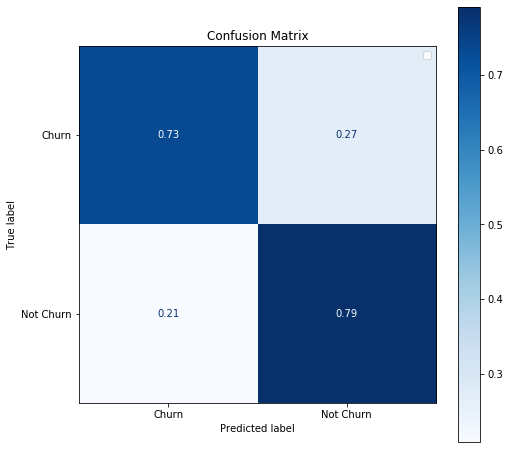

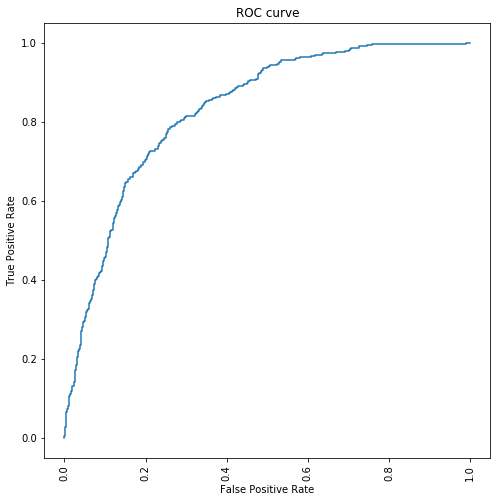

In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

# Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma=1.0, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.66      0.77      1283
           1       0.48      0.83      0.61       473

    accuracy                           0.71      1756
   macro avg       0.70      0.75      0.69      1756
weighted avg       0.80      0.71      0.72      1756

Accuracy Score:  0.7084282460136674
Area under curve :  0.7477453576530957 

[[0.66250974 0.33749026]
 [0.16701903 0.83298097]]


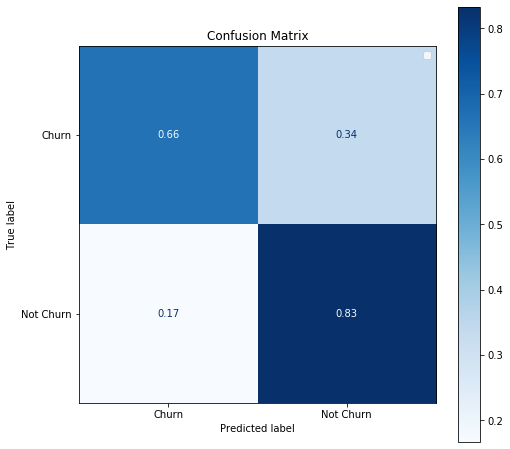

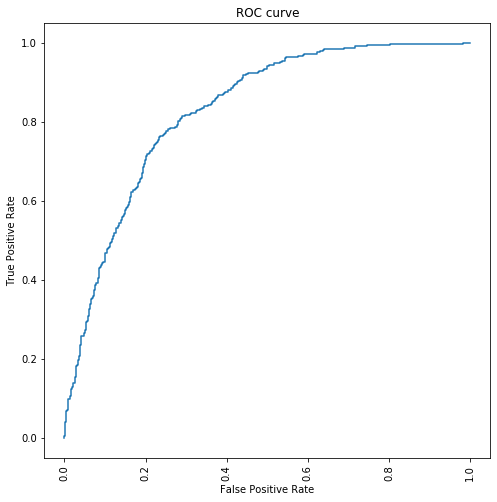

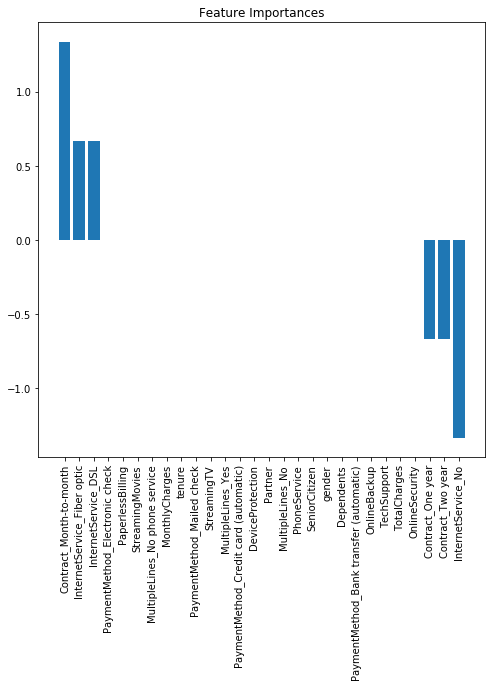

In [77]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=10, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)

cols = [i for i in df.columns if i not in Id_col + target_col]
telecom_churn_prediction(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients")

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1283
           1       0.58      0.39      0.47       473

    accuracy                           0.76      1756
   macro avg       0.69      0.65      0.66      1756
weighted avg       0.74      0.76      0.74      1756

Accuracy Score   :  0.7613895216400911
Area under curve :  0.6451754031826175
[[0.89711613 0.10288387]
 [0.60676533 0.39323467]]


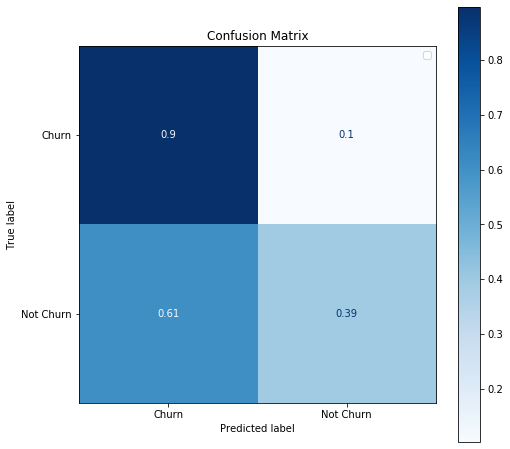

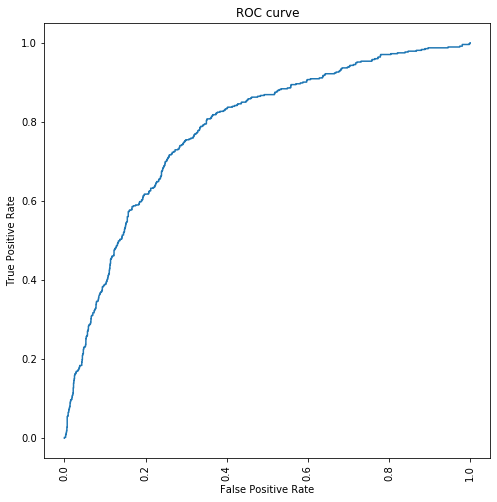

In [80]:
#Support vector classifier
#using non-linear hyper plane("rbf")

svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)

telecom_churn_prediction_alg(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y)

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

 Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1283
           1       0.54      0.51      0.52       473

    accuracy                           0.75      1756
   macro avg       0.68      0.67      0.68      1756
weighted avg       0.75      0.75      0.75      1756

Accuracy Score:  0.7517084282460137
Area under curve :  0.6739209602230501 

[[0.84255651 0.15744349]
 [0.49471459 0.50528541]]


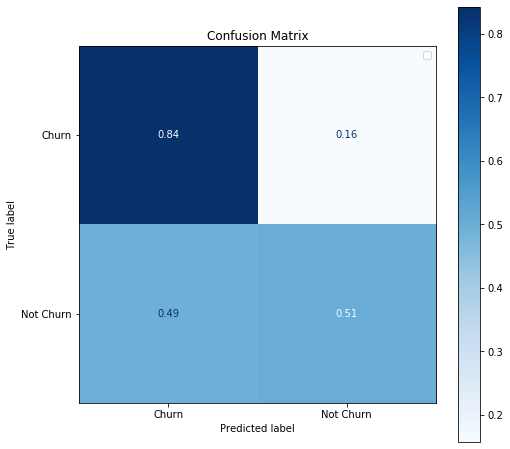

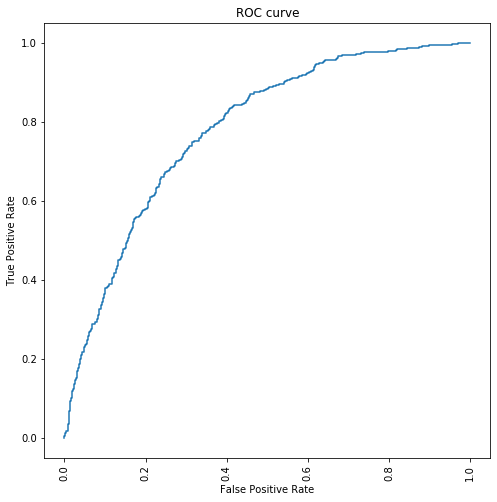

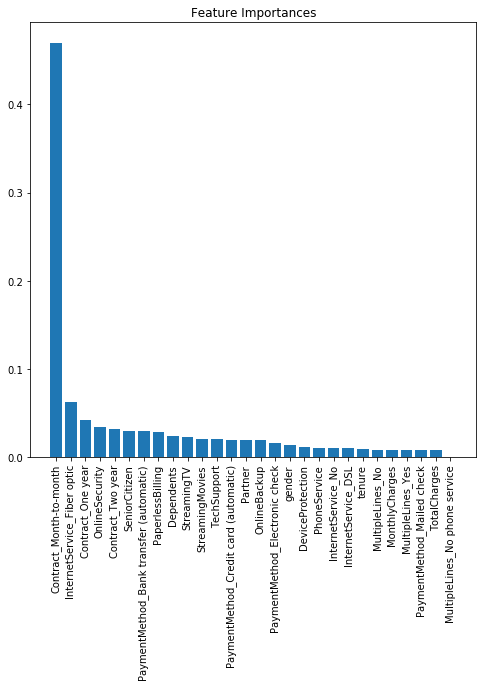

In [83]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)


telecom_churn_prediction(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"features")

In [86]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier RBF")
model10 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = pd.DataFrame(np.round(model_performances,4))

table

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWar

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric
0,Logistic Regression(Baseline_model),0.7899,0.5349,0.6294,0.5783,0.7094,0.4396
1,Logistic Regression(SMOTE),0.7483,0.7928,0.5216,0.6292,0.7623,0.4507
2,Logistic Regression(RFE),0.7415,0.7865,0.5131,0.6210,0.7557,0.4377
3,Decision Tree,0.7682,0.5899,0.5671,0.5782,0.7119,0.4185
4,KNN Classifier,0.6970,0.7674,0.4624,0.5771,0.7193,0.3630
5,Random Forest Classifier,0.7836,0.4715,0.6317,0.5400,0.6851,0.4024
6,Naive Bayes,0.7472,0.7907,0.5202,0.6275,0.7609,0.4482
7,SVM Classifier Linear,0.7084,0.8330,0.4764,0.6062,0.7477,0.4008
8,SVM Classifier RBF,0.7614,0.3932,0.5849,0.4703,0.6452,0.3239
9,XGBoost Classifier,0.7517,0.5053,0.5420,0.5230,0.6739,0.3554


# Analysis

Accuracy vs ROC AUC

The first big difference is that we calculate accuracy on the predicted classes while you calculate ROC AUC on predicted scores. That means we will have to find the optimal threshold for your problem. 

Moreover, accuracy looks at fractions of correctly assigned positive and negative classes. That means if our problem is highly imbalanced we get a really high accuracy score by simply predicting that all observations belong to the majority class.

On the flip side, if your problem is balanced and you care about both positive and negative predictions, accuracy is a good choice because it is really simple and easy to interpret.

Another thing to remember is that ROC AUC is especially good at ranking predictions. Because of that, if you have a problem where sorting your observations is what you care about ROC AUC is likely what you are looking for.

There is an interesting metric called Cohen Kappa that takes imbalance into consideration by calculating the improvement in accuracy over the “sample according to class imbalance” model.